# U.S. Medical Insurance Costs

**Scope**: compare each variable and see its impact on charges.

These include:  
- age  
- sex  
- bmi  
- children  
- smoker  
- region

In [183]:
# bring in file
import csv

# list for each variable
ages = [] #int
sexes = [] #string
bmis = [] #float
children = [] #int
smokers = [] #boolean
regions = [] #string
charges = [] #float

# add data from csv to lists
with open('insurance.csv') as insurance_costs:
    costs = csv.DictReader(insurance_costs)
    for cost in costs:
        ages.append(int(cost['age']))
        sexes.append(cost['sex'])
        bmis.append(float(cost['bmi']))
        children.append(int(cost['children']))
        if cost['smoker'] == 'yes': smokers.append(True)
        else: smokers.append(False)
        regions.append(cost['region'])
        charges.append(float(cost['charges']))

Create a class with functions to run calculations on a data set of this structure.

In [184]:
class InsCost:
    def __init__(self, ages, sexes, bmis, children, smokers, regions, charges):
        self.ages = ages
        self.sexes = sexes
        self.bmis = bmis
        self.children = children
        self.smokers = smokers
        self.regions = regions
        self.charges = charges
    
    def averages(self):
        self.average_age = sum(ages) / len(ages)
        self.average_bmi = sum(bmis) / len(bmis)
        self.average_children = sum(children) / len(children)
        self.average_charges = sum(charges) / len(charges)
    
    def sex_count(self):
        self.women = 0
        for sex in self.sexes: self.women += int(sex == 'female')
        self.men = len(self.sexes) - self.women
    
    def smoker_count(self):
        self.smokers = 0
        for status in self.smokers: self.smokers += int(status)
        self.nonsmokers = len(self.smokers) - self.smokers
    
    def split_by_smoking_status(self, to_split):
        smoker_values = []
        nonsmoker_values = []
        for i in range(len(data_set.smokers)):
            if data_set.smokers[i]: smoker_values.append(to_split[i])
            else: nonsmoker_values.append(to_split[i])
        return smoker_values, nonsmoker_values
    
    def split_by_sex(self, to_split):
        male_values = []
        female_values = []
        for i in range(len(data_set.smokers)):
            if data_set.sexes[i] == 'male': male_values.append(to_split[i])
            else: female_values.append(to_split[i])
        return male_values, female_values

Create object from class and data set

In [185]:
data_set = InsCost(ages, sexes, bmis, children, smokers, regions, charges)

Plot age and cost

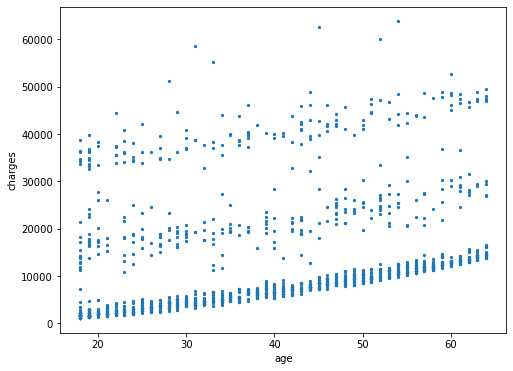

In [186]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
#plt.yticks(np.arange(0, max(data_set.charges), 1000))

plt.scatter(data_set.ages, data_set.charges, s=5)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

It looks like cost goes up with age. The three clustered bands with parallel slopes suggest that this is a general relationship independent of other variables.

I'm curious to see if one of the other variables explains the y difference between the bands.

First, I'll color dots by **smokers(red)** and **nonsmokers(blue)**

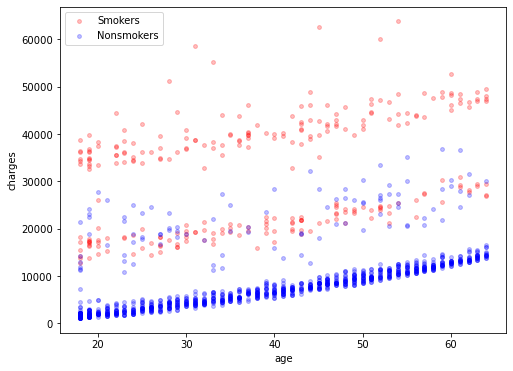

In [187]:
import matplotlib.pyplot as plt

colors = []
plt.figure(figsize=(8, 6))

smoker_ages = data_set.split_by_smoking_status(data_set.ages)[0]
nonsmoker_ages = data_set.split_by_smoking_status(data_set.ages)[1]
smoker_charges = data_set.split_by_smoking_status(data_set.charges)[0]
nonsmoker_charges = data_set.split_by_smoking_status(data_set.charges)[1]

plt.scatter(smoker_ages, smoker_charges, s=15, color='red', label='Smokers', alpha=0.25)
plt.scatter(nonsmoker_ages, nonsmoker_charges, s=15, color='blue', label='Nonsmokers', alpha=0.25)

plt.xlabel('age')
plt.ylabel('charges')
plt.legend(loc='upper left')
plt.show()

From this, it's clear that smokers have higher charges regardless of age. However, something else is impacting charges: the bottom (low charge) band is almost entirely non-smokers, and the top (high charge) band is almost entirely smokers, but the middle band is a mix of smokers and non-smokers.

This raises a couple of questions:  
1. Why do the smokers in that band have lower charges than other smokers?
2. Why do the nonsmokers in that band have higher charges than other nonsmokers?

Lets look at charges by BMI stratified by smokers/nonsmokers:

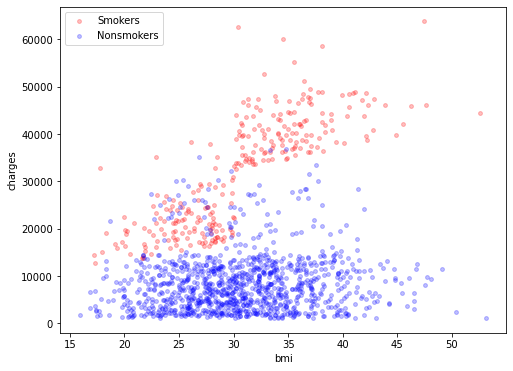

In [188]:
smoker_bmis = data_set.split_by_smoking_status(data_set.bmis)[0]
nonsmoker_bmis = data_set.split_by_smoking_status(data_set.bmis)[1]

plt.figure(figsize=(8, 6))

plt.scatter(smoker_bmis, smoker_charges, s=15, color='red', label='Smokers', alpha=.25)
plt.scatter(nonsmoker_bmis, nonsmoker_charges, s=15, color='blue', label='Nonsmokers', alpha=.25)

plt.xlabel('bmi')
plt.ylabel('charges')
plt.legend(loc='upper left')
plt.show()

It appears that higher BMI is associated with much higher costs among smokers than non-smokers.

What about looking charges by number of children for smokers and non-smokers?

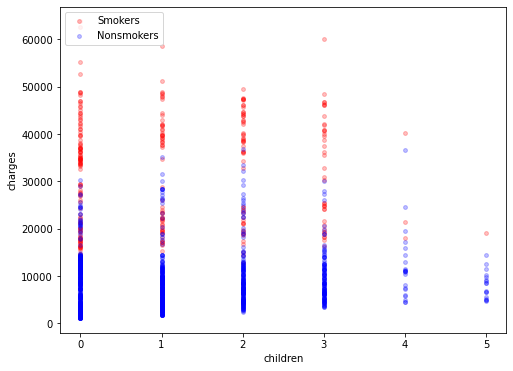

In [189]:
smoker_children = data_set.split_by_smoking_status(data_set.children)[0]
nonsmoker_children = data_set.split_by_smoking_status(data_set.children)[1]

plt.figure(figsize=(8, 6))

plt.scatter(smoker_children, smoker_charges, s=15, color='red', label='Smokers', alpha=.25)
plt.scatter(nonsmoker_children, nonsmoker_charges, s=15, color='blue', label='Nonsmokers', alpha=.25)

plt.xlabel('children')
plt.ylabel('charges')
plt.legend(loc='upper left')
plt.show()

Not particularly interesting. There doesn't seem to be significant variation at 0-3 children, and the numbers of patients with 4 and 5 are low.  

Finally, let's isolate smoking and charges:

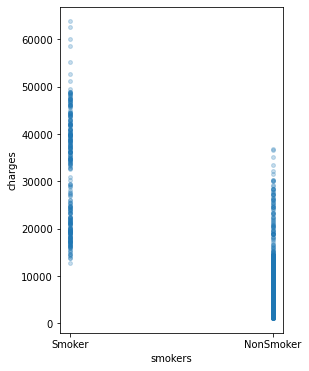

In [204]:
plt.figure(figsize=(4, 6))

smoker_data = []
for value in data_set.smokers:
    if value == True: smoker_data.append('Smoker')
    else: smoker_data.append('NonSmoker')

plt.scatter(smoker_data, data_set.charges, s=15, alpha=.25)

plt.xlabel('smokers')
plt.ylabel('charges')
plt.show()

It's clear that smoking is a major driver of higher charges!

What about breaking the data out by sex?

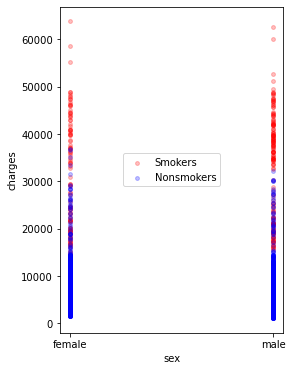

In [205]:
smoker_men = data_set.split_by_smoking_status(data_set.sexes)[0]
smoker_women = data_set.split_by_smoking_status(data_set.sexes)[1]

plt.figure(figsize=(4, 6))

plt.scatter(smoker_men, smoker_charges, s=15, color='red', label='Smokers', alpha=.25)
plt.scatter(smoker_women, nonsmoker_charges, s=15, color='blue', label='Nonsmokers', alpha=.25)

plt.xlabel('sex')
plt.ylabel('charges')
plt.legend(loc='center')
plt.show()

There seems to be some differences here - male smokers appear to have slightly higher costs than female smokers.

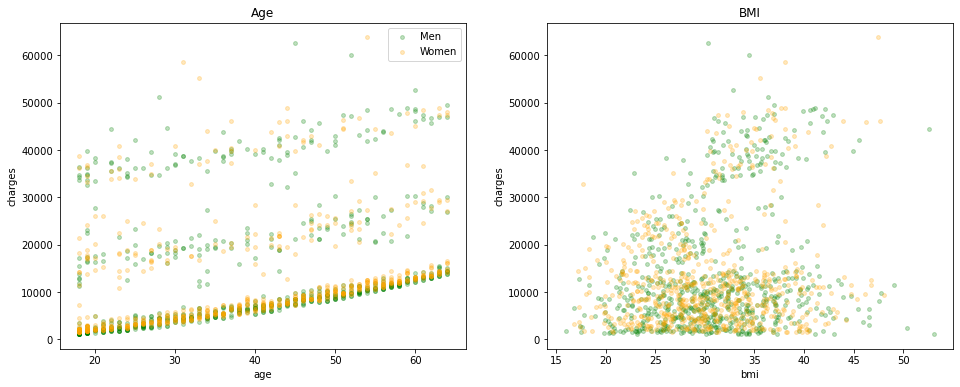

In [206]:
charges_men = data_set.split_by_sex(data_set.charges)[0]
charges_women = data_set.split_by_sex(data_set.charges)[1]

ages_men = data_set.split_by_sex(data_set.ages)[0]
ages_women = data_set.split_by_sex(data_set.ages)[1]

bmis_men = data_set.split_by_sex(data_set.bmis)[0]
bmis_women = data_set.split_by_sex(data_set.bmis)[1]

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(ages_men, charges_men, s=15, color='green', label='Men', alpha=.25)
plt.scatter(ages_women, charges_women, s=15, color='orange', label='Women', alpha=.25)
plt.xlabel('age')
plt.ylabel('charges')
plt.legend(loc='upper right')
plt.title('Age')

plt.subplot(1, 2, 2)
plt.scatter(bmis_men, charges_men, s=15, color='green', label='Men', alpha=.25)
plt.scatter(bmis_women, charges_women, s=15, color='orange', label='Women', alpha=.25)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('BMI')

plt.show()

Not a ton of obvious variation here. It looks like smoking is the biggest factor driving cost, followed by age. It'd be interesting to look at patterns by region, but that'll have to wait for another time!